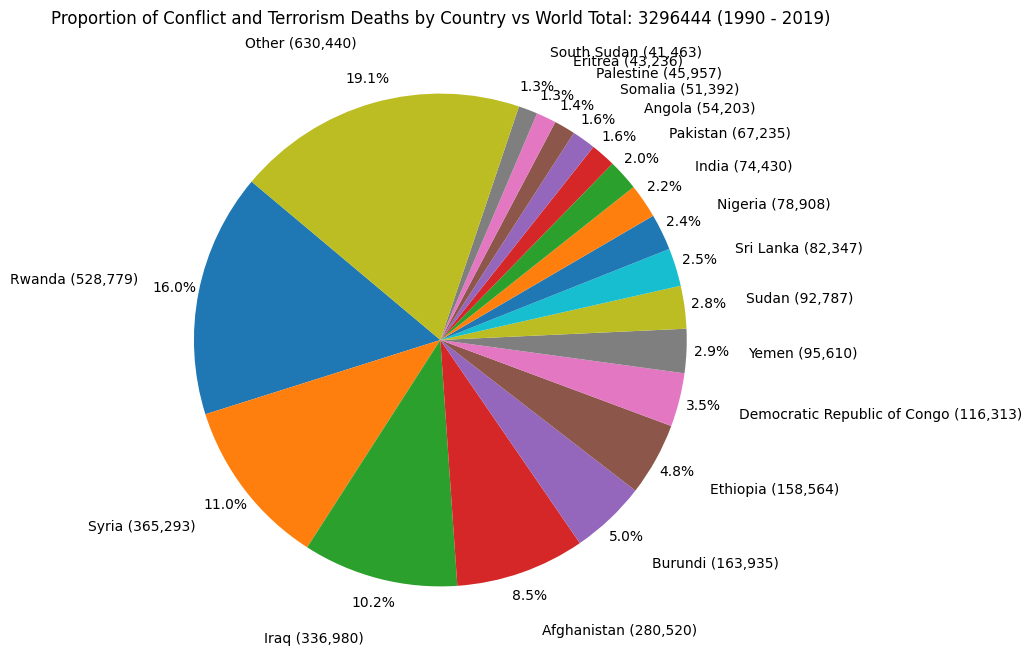

In [75]:
# Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('summary1.db')

# Query to get the total deaths for 'World'
world_query = """
SELECT total_deaths 
FROM country_conflict_deaths_summary
WHERE country = 'World'
"""
world_result = pd.read_sql(world_query, conn)
if not world_result.empty:
    world_deaths = world_result['total_deaths'].iloc[0]
else:
    world_deaths = "Unavailable"

# Query the summed data from the database, excluding 'World' and other group entities
exclusions = ( 'World', 'World Bank High Income', 
        'World Bank Low Income', 'World Bank Upper Middle Income', 
        'African Region (WHO)', 'Sub-Saharan Africa (WB)', 
        'Eastern Mediterranean Region (WHO)', 'World Bank Lower Middle Income',
        'Middle East & North Africa (WB)', 'South Asia'
        'South-East Asia Region (WHO)', 'European Region (WHO)',
        'Europe & Central Asia (WB)', 'South Asia (WB)',
        'South-East Asia Region (WHO)', 'G20',
        'East Asia & Pacific (WB)', 'Region of the Americas (WHO)',
        'Latin America & Caribbean (WB)', 'OECD Countries',
        'Western Pacific Region (WHO)')  # Adjust to exclude any aggregated groups

query = f"""
SELECT country, total_deaths 
FROM country_conflict_deaths_summary
WHERE country NOT IN {exclusions}
ORDER BY total_deaths DESC
"""
data = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Calculate the 'Other' category for countries with small numbers
threshold = 40000  # Set your threshold
filtered_data = data[data['total_deaths'] > threshold]
other_sum = data[data['total_deaths'] <= threshold]['total_deaths'].sum()

# Append 'Other' category if needed using pd.concat
if other_sum > 0:
    other_data = pd.DataFrame({'country': ['Other'], 'total_deaths': [other_sum]})
    filtered_data = pd.concat([filtered_data, other_data], ignore_index=True)

# Create labels that include the death toll for each slice
labels = [f'{row["country"]} ({row["total_deaths"]:,})' for index, row in filtered_data.iterrows()]

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(filtered_data['total_deaths'], labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=1.1, labeldistance=1.25)
plt.title(f'Proportion of Conflict and Terrorism Deaths by Country vs World Total: {world_deaths} (1990 - 2019)')
plt.show()